# ruin the $Q^2$ reconstruction in GENIE simulations based on the overlay

In [1]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
%matplotlib inline
from scipy import stats

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Q2/'

In [3]:
# overlay scaling
import json
overlay_scaling = json.load(open("/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/SelectedEvents/overlay_scaling.txt"))
overlay_scaling

{u'1mu-1p': 0.03578088045074869,
 u'CC 1p 0pi': 0.03578088045074869,
 u'N(Ovelay)/N(On)': 7.667022982362373,
 u'cosmic': 0.22106943595880704,
 u'other pairs': 0.03578088045074868}

In [4]:
selected_overlay=dict()
for pair_type in pair_types:
    selected_overlay[pair_type]=pd.read_csv('/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/SelectedEvents/selected_'+pair_type+'.csv')
selected_CC1p0pi=pd.read_csv('/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/SelectedEvents/selected_cc1p0pi.csv')
selected_events=pd.read_csv('/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/SelectedEvents/selected_events.csv')
print len(pd.concat([selected_overlay['1mu-1p'],selected_overlay['cosmic'],selected_overlay['other pairs']])),'events in the overlay'
print len(selected_CC1p0pi),'selected CC 1p 0pi pairs in overlay'

9384 events in the overlay
7304 selected CC 1p 0pi pairs in overlay


# $Q^2$ distribution in the overlay

# ‘ruin’ $Q^2$ in GENIE to account for reconstruction?

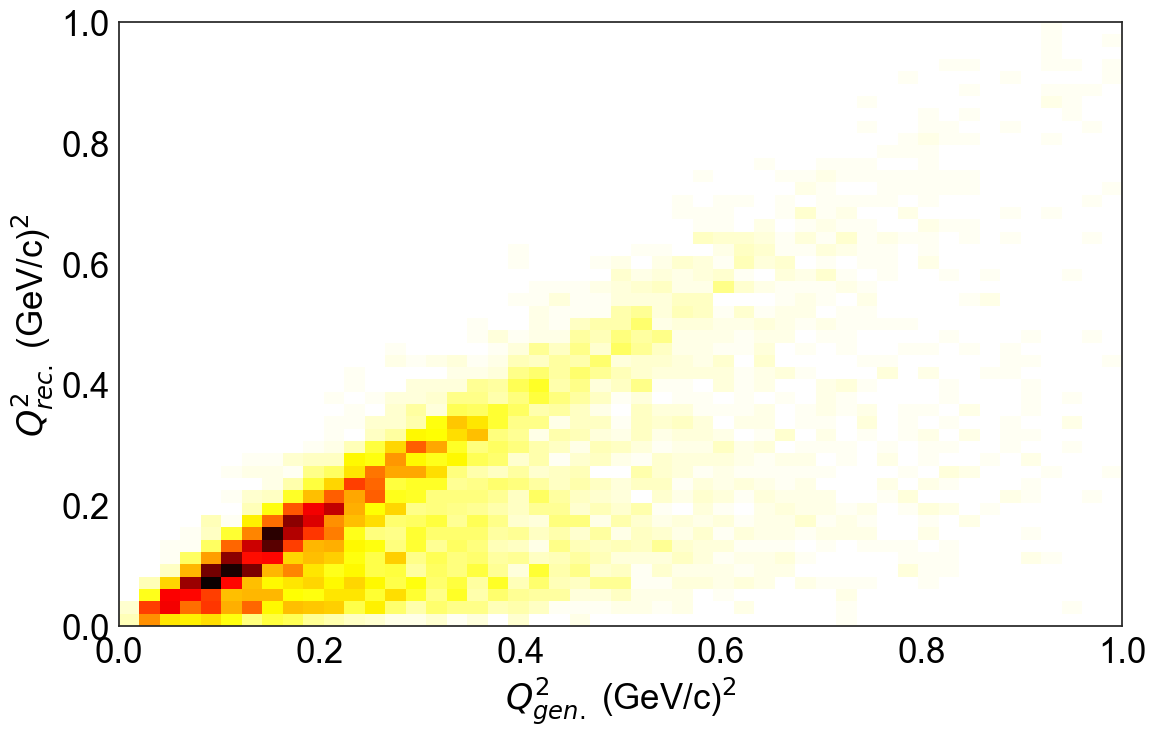

In [43]:
fig=plt.figure(figsize=(12.944,8))
ax=fig.add_subplot(1,1,1)
h,xedges,yedges,_,_=plot_2d_hist(selected_CC1p0pi['truth_Q2'],selected_CC1p0pi['reco_Q2']
                                 ,bins=linspace(0,1,50),ax=ax)
set_axes(ax,r'$Q^2_{gen.}$ (GeV/c)$^2$',r'$Q^2_{rec.}$ (GeV/c)$^2$')

## save to CSV

In [59]:
mapname='Q2_gen_rec'
for array,name in zip([xedges,h]
                      ,['bins','map']):
    filename="/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/acceptance_maps/%s_%s.csv"%(mapname,name)
    np.savetxt(filename, array, delimiter=",")
    print 'saved',name,'into\n',filename

saved bins into
/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/acceptance_maps/Q2_gen_rec_bins.csv
saved map into
/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/acceptance_maps/Q2_gen_rec_map.csv


## check if it works

In [44]:
def find_Q2_bin(Q2,xedges):
    for i in range(len(xedges)-1):
        if xedges[i]<Q2 and Q2<xedges[i+1]:
            return i

In [55]:
x = 0.5*(xedges[1:]+xedges[:-1])
Q2_gen_arr,Q2_rec_arr = [],[]
for n in range(10000):
    Q2_sampled = np.random.uniform(0,1)
    i = find_Q2_bin(Q2_sampled,xedges)
    Q2_gen = xedges[i]
    Q2_gen_arr.append(Q2_gen)

    Q2_rec = np.random.choice(x,p=(h[i,:]/np.sum(h[i,:])))
    Q2_rec_arr.append(Q2_rec)
#     print 'Q2_sampled:',Q2_sampled
#     print 'Q2_gen:',Q2_gen
#     print 'Q2_rec:',Q2_rec
print 'done'

done


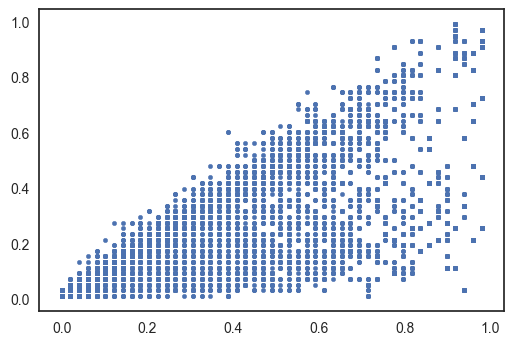

In [56]:
plt.scatter(Q2_gen_arr,Q2_rec_arr,cmap='hot_r',s=10)

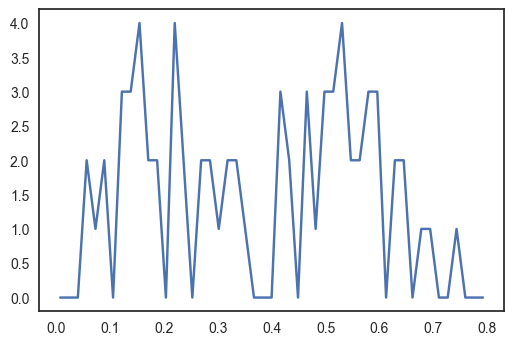

In [26]:
x = 0.5*(xedges[1:]+xedges[:-1])
plt.plot(x,h[35,:]);